In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pd.set_option('display.max_columns', 150)
df=pd.read_csv("../data/01_raw/train.csv")
df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,3,2,1331,721,1970,15,1,4,1,0,1,2
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14,1,0,1,3
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,2,15,364,721,1970,18,12,11,1,0,1,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,8,4,447,1162,1950,15,3,19,1,0,0,2
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,6,5,364,1917,1970,16,7,6,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1994,710,0,1.827054,0,0,1,61,0.139117,199,6,7,788,1023,3269,12,4,2,1,1,1,1
1196,1995,965,1,0.498963,0,6,0,32,0.923505,103,1,2,813,721,1970,18,5,20,1,0,0,3
1197,1996,1949,0,0.470755,0,1,0,38,0.798602,134,6,20,115,1951,1598,18,3,17,0,0,0,1
1198,1997,1537,0,1.323370,0,1,1,4,0.122960,187,3,7,376,1692,3952,14,2,9,1,1,0,1


In [15]:
df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1014.411667,1208.958333,0.408333,1.231201,0.565833,1.452500,0.625833,29.747500,0.374023,137.475833,3.815000,7.836667,552.335000,1411.056667,1931.339167,11.970000,4.717500,10.376667,0.891667,0.410833,0.455000,1.620000
std,577.846419,421.707099,0.491730,0.786728,0.495854,2.590045,0.484109,17.514071,0.322579,34.706169,2.455769,6.087764,419.165889,467.548272,1157.539911,4.304595,3.346445,5.180942,0.310931,0.492190,0.498179,1.018069
min,0.000000,518.000000,0.000000,0.466459,0.000000,0.000000,0.000000,2.000000,0.013852,80.000000,1.000000,0.000000,4.000000,510.000000,267.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,517.750000,916.000000,0.000000,0.498935,0.000000,0.000000,0.000000,15.000000,0.036577,105.000000,1.000000,3.000000,272.000000,1011.000000,790.000000,7.000000,2.000000,7.000000,1.000000,0.000000,0.000000,1.000000
50%,1030.500000,1203.000000,0.000000,1.086733,1.000000,0.000000,1.000000,28.000000,0.351939,135.000000,3.000000,6.500000,381.000000,1456.000000,1970.000000,12.000000,4.000000,9.000000,1.000000,0.000000,0.000000,2.000000
75%,1504.250000,1537.000000,1.000000,1.864943,1.000000,2.000000,1.000000,45.000000,0.798296,168.000000,6.000000,13.000000,788.000000,1917.000000,3269.000000,16.000000,7.000000,14.000000,1.000000,1.000000,1.000000,2.000000
max,1999.000000,1991.000000,1.000000,2.730560,1.000000,16.000000,1.000000,64.000000,0.939585,199.000000,8.000000,20.000000,1858.000000,1988.000000,3952.000000,19.000000,16.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
float_value_columns=["clock_speed","m_dep"]
int_value_columns=["battery_power","fc","int_memory","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time"]
bool_columns=["blue","dual_sim","four_g","three_g","touch_screen","wifi"]
cate_columns=["price_range"]

In [17]:
df[float_value_columns]=df[float_value_columns].astype(float)
df[int_value_columns]=df[int_value_columns].astype(int)
df[bool_columns]=df[bool_columns].astype(bool)
df[cate_columns]=df[cate_columns].astype("category")
df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,False,0.680981,True,1,True,23,0.402580,117,3,2,1331,721,1970,15,1,4,True,False,True,2
1,3,1203,True,2.602754,True,0,False,8,0.415612,194,1,19,1571,1262,1150,14,16,14,True,False,True,3
2,4,1980,True,2.604065,True,0,False,6,0.858110,122,2,15,364,721,1970,18,12,11,True,False,True,1
3,5,1185,True,2.669403,True,3,False,33,0.027065,132,8,4,447,1162,1950,15,3,19,True,False,False,2
4,7,1203,True,2.375453,False,4,True,12,0.141485,135,6,5,364,1917,1970,16,7,6,True,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1994,710,False,1.827054,False,0,True,61,0.139117,199,6,7,788,1023,3269,12,4,2,True,True,True,1
1196,1995,965,True,0.498963,False,6,False,32,0.923505,103,1,2,813,721,1970,18,5,20,True,False,False,3
1197,1996,1949,False,0.470755,False,1,False,38,0.798602,134,6,20,115,1951,1598,18,3,17,False,False,False,1
1198,1997,1537,False,1.323370,False,1,True,4,0.122960,187,3,7,376,1692,3952,14,2,9,True,True,False,1


'blue'

'dual_sim'

'four_g'

'three_g'

'touch_screen'

'wifi'

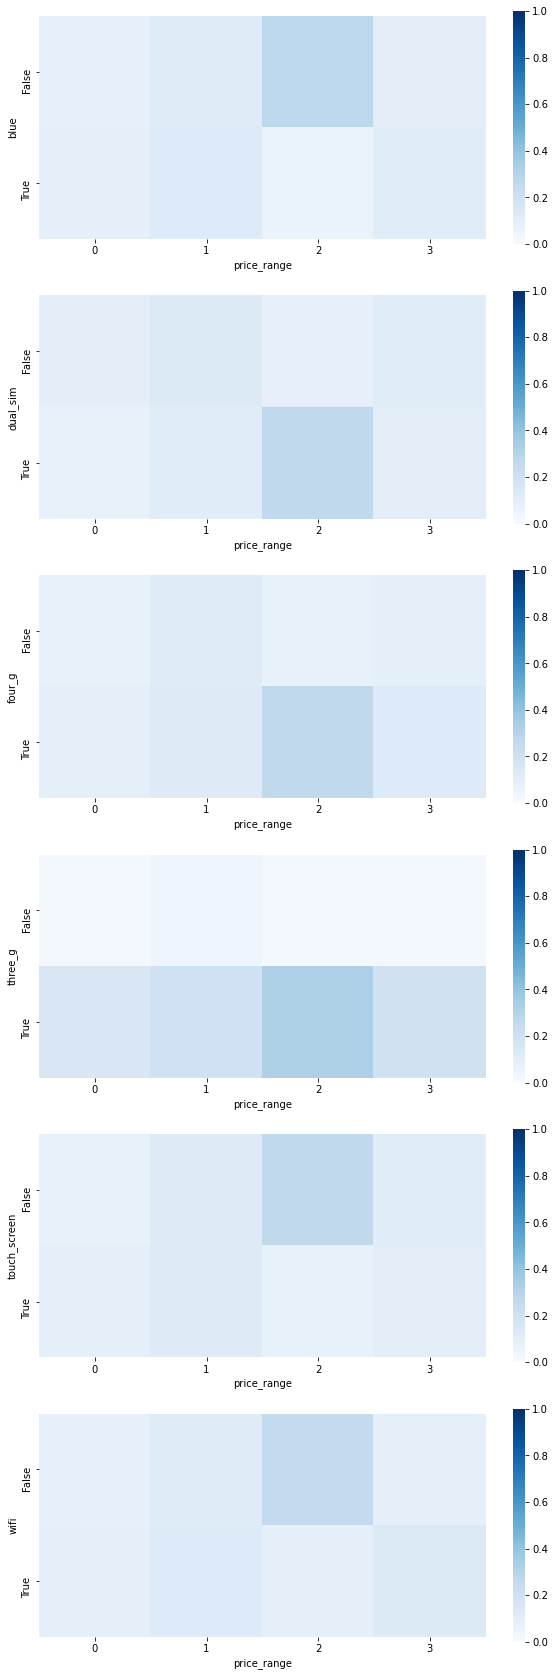

In [33]:
fig,axs=plt.subplots(len(bool_columns),1,figsize=(10,30))
for i,c in enumerate(bool_columns):
    display(c)
    heat=pd.crosstab(df[c],df["price_range"], normalize=True)
    sns.heatmap(heat,cmap="Blues",vmin=0,vmax=1,ax=axs[i],square=True)

<AxesSubplot:>

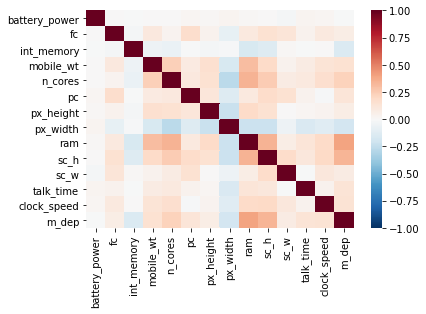

In [37]:
heat=df[int_value_columns+float_value_columns].corr()
sns.heatmap(heat,vmin=-1,vmax=1,cmap="RdBu_r")

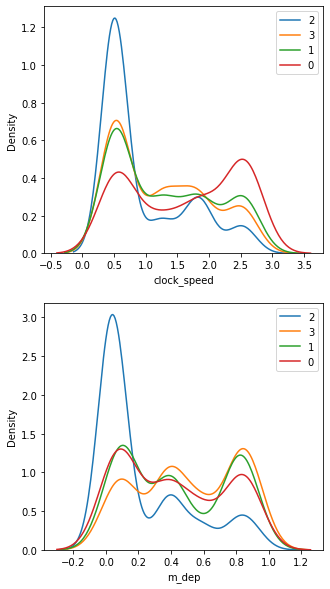

In [42]:
fig,axs=plt.subplots(len(float_value_columns),1,figsize=(5,10))
for i,c in enumerate(float_value_columns):
    for b in df["price_range"].unique():
        sns.kdeplot(df.loc[df["price_range"]==b,c],ax=axs[i],label=b)
    axs[i].legend()

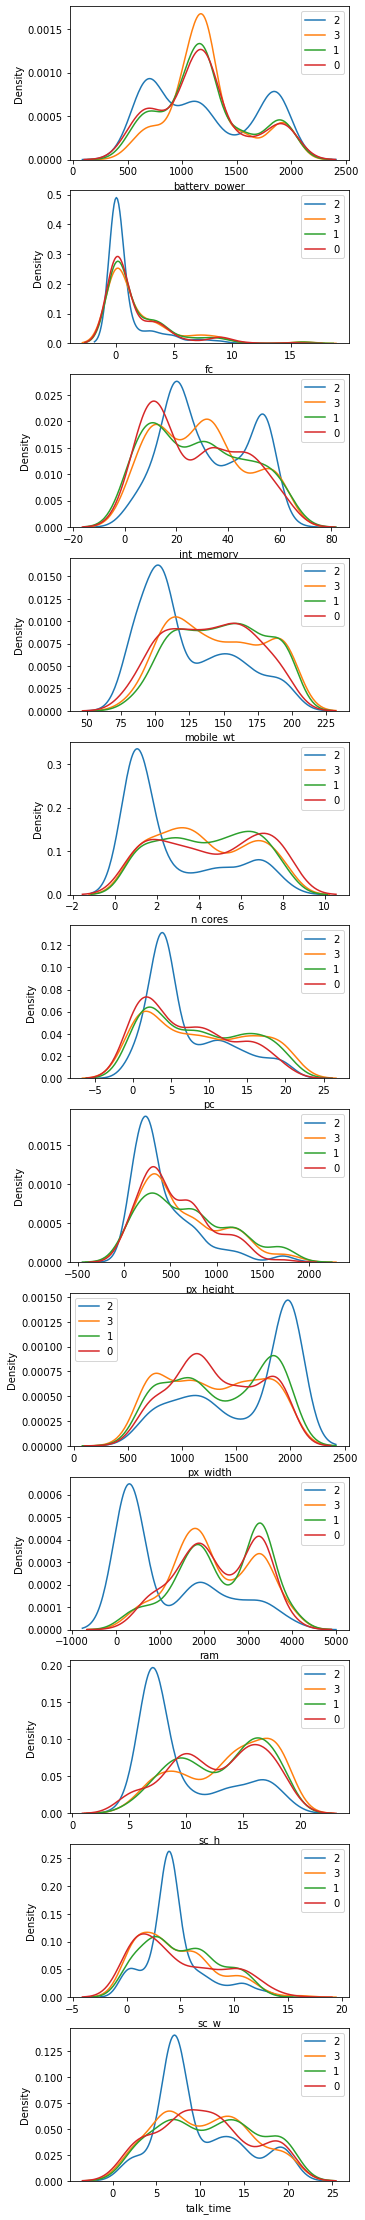

In [44]:
fig,axs=plt.subplots(len(int_value_columns),1,figsize=(5,40))
for i,c in enumerate(int_value_columns):
    for b in df["price_range"].unique():
        sns.kdeplot(df.loc[df["price_range"]==b,c],ax=axs[i],label=b)
    axs[i].legend()

In [10]:
df=pd.read_csv("../data/01_raw/sample_submission.csv",header=None)
df[0].to_list()

[1,
 2,
 6,
 10,
 12,
 13,
 15,
 18,
 23,
 24,
 25,
 26,
 29,
 31,
 34,
 36,
 37,
 40,
 47,
 52,
 54,
 58,
 60,
 62,
 64,
 66,
 69,
 71,
 75,
 76,
 79,
 80,
 81,
 83,
 87,
 88,
 89,
 92,
 93,
 97,
 99,
 100,
 103,
 106,
 107,
 110,
 111,
 116,
 117,
 126,
 128,
 129,
 133,
 140,
 143,
 144,
 145,
 149,
 153,
 158,
 164,
 166,
 169,
 171,
 172,
 174,
 176,
 177,
 179,
 181,
 182,
 188,
 189,
 191,
 192,
 195,
 196,
 197,
 199,
 202,
 204,
 205,
 209,
 210,
 214,
 219,
 220,
 221,
 222,
 226,
 227,
 228,
 231,
 234,
 235,
 238,
 240,
 241,
 244,
 245,
 246,
 247,
 250,
 252,
 253,
 254,
 255,
 256,
 257,
 260,
 262,
 263,
 266,
 267,
 268,
 269,
 272,
 274,
 275,
 277,
 282,
 283,
 285,
 286,
 294,
 295,
 296,
 297,
 301,
 303,
 304,
 308,
 309,
 311,
 313,
 314,
 316,
 319,
 331,
 332,
 334,
 336,
 338,
 339,
 343,
 344,
 345,
 349,
 350,
 354,
 355,
 358,
 359,
 367,
 371,
 372,
 375,
 378,
 379,
 380,
 382,
 387,
 389,
 390,
 392,
 395,
 402,
 403,
 404,
 407,
 411,
 417,
 418,
 419,
